In [2]:
import pandas as pd

In [3]:
import pyodbc
# Connect to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=Sudhakar\\SQLEXPRESS01;DATABASE=Local_database;UID=sa;PWD=123;Timeout=60')

# SQL query
query = """
SELECT 
    a.book_id, 
    a.title, 
    a.isbn13, 
    a.publication_date, 
    b.language_name,    
    c.publisher_name,   
    d.customer_id,	
    e.order_id,    
	h.author_name
FROM 
    book a
JOIN 
    book_language b   ON a.language_id = b.language_id
JOIN 
    publisher c  ON a.publisher_id = c.publisher_id
JOIN 
    order_line f ON a.book_id = f.book_id        
JOIN 
    cust_order e  ON e.order_id = f.order_id      
JOIN 
    customer d  ON d.customer_id = e.customer_id
JOIN
	book_author g on a.book_id = g.book_id
JOIN 
	author h on g.author_id = h.author_id 
"""

# Execute the query a
result = pd.read_sql_query(query, conn)
df = pd.DataFrame(result)
# Close the connection
conn.close()

df


C:\Users\sudha\AppData\Local\Temp\ipykernel_22860\2159361303.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, conn)


,book_id,title,isbn13,publication_date,language_name,publisher_name,customer_id,order_id,author_name
0,1,The World's First Love: Mary Mother of God,8987059752,1996-09-01,United States English,Ignatius Press,408,816,Fulton J. Sheen
1,2,The Illuminati,20049130001,2004-10-04,English,Thomas Nelson,532,1064,Larry Burkett
2,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1983-12-29,English,Cliffs Notes,382,763,W. John Campbell
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1983-12-29,English,Cliffs Notes,505,3510,W. John Campbell
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,2000-04-01,English,Applause Theatre & Cinema Book Publishers,488,4976,Eric Bentley
...,...,...,...,...,...,...,...,...,...
23417,11123,Asfixia,9789875661707,2006-09-01,English,Debolsillo,561,1121,Chuck Palahniuk
23418,11123,Asfixia,9789875661707,2006-09-01,English,Debolsillo,11,7121,Chuck Palahniuk
23419,11124,El Dia Que Nietzsche Lloró,9789875801448,2006-10-24,Spanish,Planeta,111,221,Irvin D. Yalom
23420,11124,El Dia Que Nietzsche Lloró,9789875801448,2006-10-24,Spanish,Planeta,69,138,Irvin D. Yalom


In [4]:
df.isnull().sum()

book_id             0
title               0
isbn13              0
publication_date    0
language_name       0
publisher_name      0
customer_id         0
order_id            0
author_name         0
dtype: int64

In [5]:
df.duplicated().sum()

7

In [6]:
df.drop_duplicates()

,book_id,title,isbn13,publication_date,language_name,publisher_name,customer_id,order_id,author_name
0,1,The World's First Love: Mary Mother of God,8987059752,1996-09-01,United States English,Ignatius Press,408,816,Fulton J. Sheen
1,2,The Illuminati,20049130001,2004-10-04,English,Thomas Nelson,532,1064,Larry Burkett
2,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1983-12-29,English,Cliffs Notes,382,763,W. John Campbell
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1983-12-29,English,Cliffs Notes,505,3510,W. John Campbell
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,2000-04-01,English,Applause Theatre & Cinema Book Publishers,488,4976,Eric Bentley
...,...,...,...,...,...,...,...,...,...
23417,11123,Asfixia,9789875661707,2006-09-01,English,Debolsillo,561,1121,Chuck Palahniuk
23418,11123,Asfixia,9789875661707,2006-09-01,English,Debolsillo,11,7121,Chuck Palahniuk
23419,11124,El Dia Que Nietzsche Lloró,9789875801448,2006-10-24,Spanish,Planeta,111,221,Irvin D. Yalom
23420,11124,El Dia Que Nietzsche Lloró,9789875801448,2006-10-24,Spanish,Planeta,69,138,Irvin D. Yalom


In [10]:
df.columns

Index(['book_id', 'title', 'isbn13', 'language_name', 'publisher_name',
       'customer_id', 'first_name', 'last_name', 'order_id', 'author_name',
       'published_day', 'published_month', 'published_year',
       'published_weekday'],
      dtype='object')

In [77]:
df.columns

Index(['book_id', 'title', 'isbn13', 'language_name', 'publisher_name',
       'customer_id', 'order_id', 'author_name', 'published_year'],
      dtype='object')

In [7]:
# convert date time formate
df["publication_date"] = pd.to_datetime(df["publication_date"])
df["published_year"] = df["publication_date"].dt.year
df.head()

,book_id,title,isbn13,publication_date,language_name,publisher_name,customer_id,order_id,author_name,published_year
0,1,The World's First Love: Mary Mother of God,8987059752,1996-09-01,United States English,Ignatius Press,408,816,Fulton J. Sheen,1996
1,2,The Illuminati,20049130001,2004-10-04,English,Thomas Nelson,532,1064,Larry Burkett,2004
2,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1983-12-29,English,Cliffs Notes,382,763,W. John Campbell,1983
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1983-12-29,English,Cliffs Notes,505,3510,W. John Campbell,1983
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,2000-04-01,English,Applause Theatre & Cinema Book Publishers,488,4976,Eric Bentley,2000


In [8]:
df.drop("publication_date",axis=1,inplace=True)

# **Exploratory Data Analysis (EDA)**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

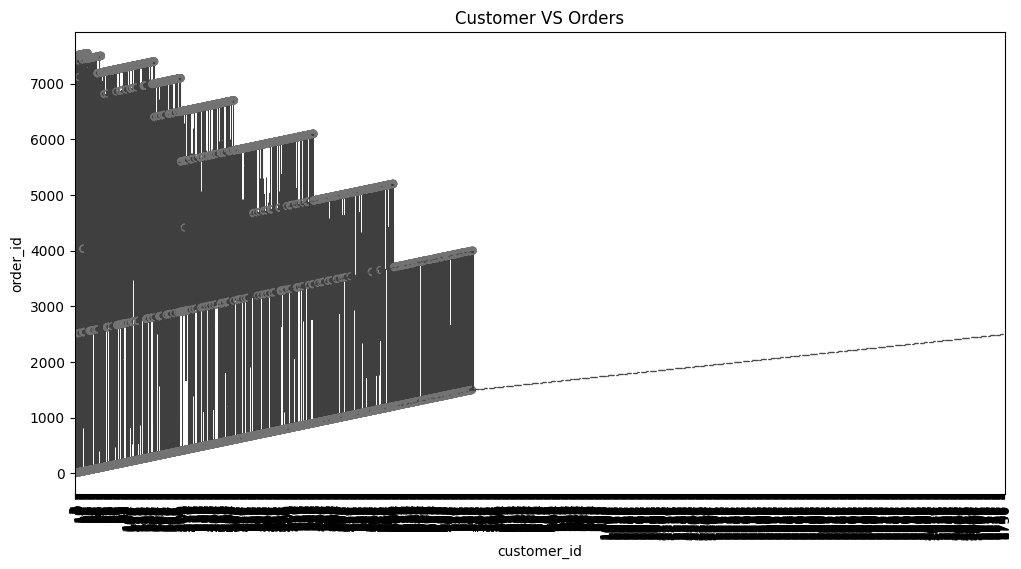

In [17]:
plt.figure(figsize=(12,6))
sns.boxenplot(x="customer_id", y="order_id", data=df)
plt.xticks(rotation=90)
plt.title("Customer VS Orders")
plt.show()


In [24]:
# Group by customer_id and author_name
customer_author = df.groupby(['customer_id', 'order_id']).size().reset_index(name='books_ordered')

customer_author.head()


,customer_id,order_id,books_ordered
0,1,1,6
1,1,2,1
2,1,2501,5
3,1,2502,1
4,1,4001,6


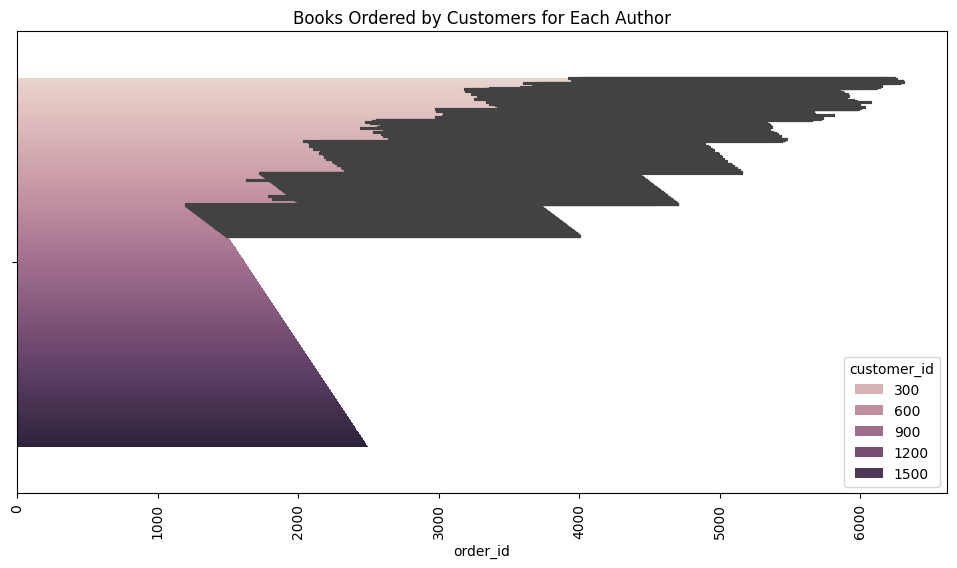

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='order_id', hue='customer_id', data=customer_author)
plt.title('Books Ordered by Customers for Each Author')
plt.xticks(rotation=90)
plt.show()


In [21]:
# Count the number 
book_ordered = df['title'].value_counts().reset_index()
book_ordered.columns = ['title', 'orders_count']

book_ordered.head()


,title,orders_count
0,Waiting for the Barbarians,7551
1,The Best American Comics 2006,64
2,The Mammoth Book of New Jules Verne Adventures...,48
3,Star Wars Tales Vol. 1,48
4,Irish Girls Are Back in Town,46


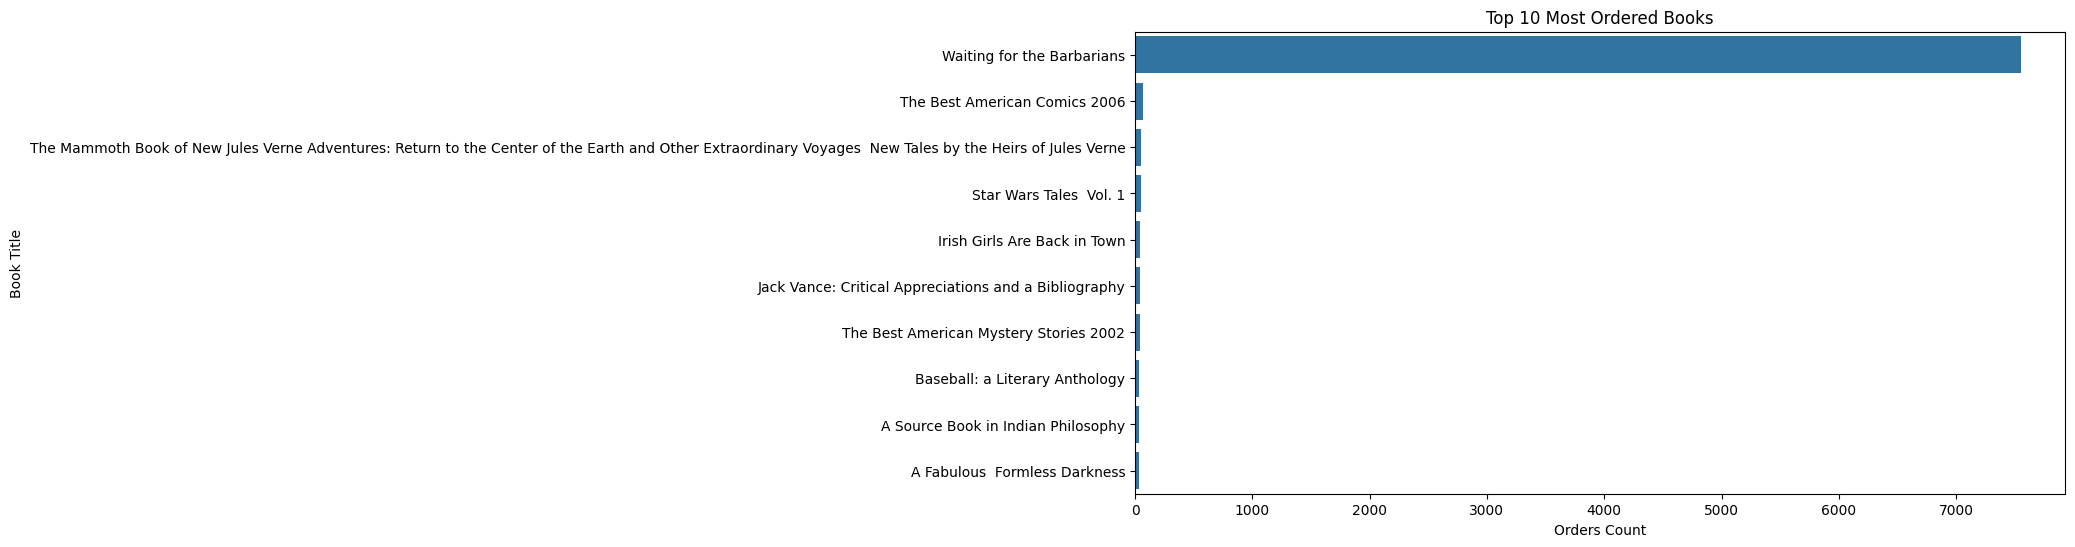

In [22]:
# Plot the top 10 most ordered books
plt.figure(figsize=(12, 6))
sns.barplot(x='orders_count', y='title', data=book_ordered.head(10))
plt.title('Top 10 Most Ordered Books')
plt.xlabel('Orders Count')
plt.ylabel('Book Title')
plt.show()


# **Feature Engineering and Encoding**

In [9]:
df.head()

,book_id,title,isbn13,language_name,publisher_name,customer_id,order_id,author_name,published_year
0,1,The World's First Love: Mary Mother of God,8987059752,United States English,Ignatius Press,408,816,Fulton J. Sheen,1996
1,2,The Illuminati,20049130001,English,Thomas Nelson,532,1064,Larry Burkett,2004
2,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,English,Cliffs Notes,382,763,W. John Campbell,1983
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,English,Cliffs Notes,505,3510,W. John Campbell,1983
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,English,Applause Theatre & Cinema Book Publishers,488,4976,Eric Bentley,2000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Combine metadata
df['combined_metadata'] = df['title'] + " " + df['author_name'] + " " + df['publisher_name']

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['combined_metadata'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust n_clusters
df['genre_cluster'] = kmeans.fit_predict(X)

# Inspect clusters to infer genres
for cluster_id in range(10):
    print(f"Cluster {cluster_id}:")
    print(df[df['genre_cluster'] == cluster_id]['title'].head(10))


In [12]:
def infer_genre(metadata):
    metadata = metadata.lower()
    
    # Define keywords for each genre
    genre_keywords = {
        "Romance": ["romance", "love", "affair", "relationship", "valentine", "passion"],
        "Science Fiction": ["sci-fi", "science fiction", "space", "alien", "robot", "futuristic", "time travel"],
        "Fantasy": ["fantasy", "magic", "wizard", "dragon", "myth", "sorcery", "elves"],
        "Mystery/Thriller": ["mystery", "thriller", "detective", "crime", "investigation", "murder", "suspense"],
        "Historical": ["history", "historical", "past", "war", "empire", "ancient", "renaissance"],
        "Horror": ["horror", "ghost", "supernatural", "haunted", "fear", "zombie", "vampire", "monster"],
        "Biography": ["biography", "memoir", "life story", "autobiography", "personal", "inspiration"],
        "Self-Help": ["self-help", "motivation", "personal development", "improvement", "success", "habit"],
        "Children's Literature": ["children", "kids", "juvenile", "fairy tale", "nursery", "storybook"],
        "Adventure": ["adventure", "exploration", "journey", "expedition", "quest", "survival"],
        "Non-Fiction": ["non-fiction", "true story", "real life", "documentary", "facts"],
        "Fiction": ["fiction", "novel", "story", "literature"],
        "Poetry": ["poetry", "poem", "verse", "lyric", "haiku"],
        "Young Adult": ["young adult", "teen", "high school", "coming of age"],
        "Spiritual/Religion": ["spiritual", "religion", "faith", "philosophy", "bible", "belief"],
        "Comedy/Humor": ["comedy", "humor", "funny", "satire", "parody", "joke"],
        "Business/Economics": ["business", "economics", "management", "finance", "entrepreneurship", "leadership"],
        "Technology": ["technology", "programming", "software", "ai", "artificial intelligence", "computing"],
        "Education/Academic": ["education", "academic", "study", "research", "textbook", "learning"],
        "Health/Fitness": ["health", "fitness", "wellness", "diet", "exercise", "nutrition"],
    }
    
    # Search for keywords in metadata
    for genre, keywords in genre_keywords.items():
        for keyword in keywords:
            if keyword in metadata:
                return genre
    
    # Default genre if no match is found
    return "General"

# Apply the function to the combined metadata column
df['genres'] = df['combined_metadata'].apply(infer_genre)


In [13]:
df

,book_id,title,isbn13,language_name,publisher_name,customer_id,order_id,author_name,published_year,combined_metadata,genre_cluster,genres
0,1,The World's First Love: Mary Mother of God,8987059752,United States English,Ignatius Press,408,816,Fulton J. Sheen,1996,The World's First Love: Mary Mother of God Fu...,5,Romance
1,2,The Illuminati,20049130001,English,Thomas Nelson,532,1064,Larry Burkett,2004,The Illuminati Larry Burkett Thomas Nelson,2,General
2,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,English,Cliffs Notes,382,763,W. John Campbell,1983,Cliffs Notes on Aristophanes' Lysistrata The ...,2,General
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,English,Cliffs Notes,505,3510,W. John Campbell,1983,Cliffs Notes on Aristophanes' Lysistrata The ...,2,General
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,English,Applause Theatre & Cinema Book Publishers,488,4976,Eric Bentley,2000,Life Is a Dream and Other Spanish Classics (Er...,7,General
...,...,...,...,...,...,...,...,...,...,...,...,...
23417,11123,Asfixia,9789875661707,English,Debolsillo,561,1121,Chuck Palahniuk,2006,Asfixia Chuck Palahniuk Debolsillo,2,General
23418,11123,Asfixia,9789875661707,English,Debolsillo,11,7121,Chuck Palahniuk,2006,Asfixia Chuck Palahniuk Debolsillo,2,General
23419,11124,El Dia Que Nietzsche Lloró,9789875801448,Spanish,Planeta,111,221,Irvin D. Yalom,2006,El Dia Que Nietzsche Lloró Irvin D. Yalom Planeta,2,General
23420,11124,El Dia Que Nietzsche Lloró,9789875801448,Spanish,Planeta,69,138,Irvin D. Yalom,2006,El Dia Que Nietzsche Lloró Irvin D. Yalom Planeta,2,General


In [15]:
df.drop(columns=["combined_metadata","genre_cluster"],axis=1,inplace=True)

In [16]:
df.columns

Index(['book_id', 'title', 'isbn13', 'language_name', 'publisher_name',
       'customer_id', 'order_id', 'author_name', 'published_year', 'genres'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

lab_encoding = LabelEncoder()

df["title"] = lab_encoding.fit_transform(df["title"])
df["language_name"] = lab_encoding.fit_transform(df["language_name"])
df["publisher_name"] = lab_encoding.fit_transform(df["publisher_name"])
df["author_name"] = lab_encoding.fit_transform(df["author_name"])
df["genres"] = lab_encoding.fit_transform(df["genres"])

In [18]:
df.head()

,book_id,title,isbn13,language_name,publisher_name,customer_id,order_id,author_name,published_year,genres
0,1,5183,8987059752,20,690,408,816,1903,1996,15
1,2,4391,20049130001,6,1335,532,1064,3441,2004,8
2,5,824,49086007763,6,302,382,763,6078,1983,8
3,5,824,49086007763,6,302,505,3510,6078,1983,8
4,6,2302,73999140774,6,67,488,4976,1713,2000,8


# **Building and Training Artificial Neural Networks (ANNs)**

In [19]:

from sklearn.model_selection import train_test_split

In [25]:
# Define target 
X = df.drop(columns=['genres'])
y = df['genres']

In [26]:
from keras.utils import to_categorical 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Apply one-hot encoding
y_new = to_categorical(y_encoded)

In [34]:
# Split data
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Combine features and targets correctly before splitting
x_train, x_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [35]:
# standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [87]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['book_age', 'published_year']),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), ['title', 'language_name', 'publisher_name', 'author_name'])
#     ])

# # Fit and transform training data
# X_train = preprocessor.fit_transform(x_train)
# X_test = preprocessor.transform(x_test)

# **Model Evaluation and Optimization**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

model = Sequential()

# Hidden layers
model.add(Dense(128,input_dim = x_train_scaled.shape[1],activation='relu')) # Hidden layer 1
model.add(Dense(64, activation='relu'))   # Hidden layer 2
model.add(Dense(32, activation='relu'))   # Hidden layer 3
model.add(Dense(16, activation='relu'))   # Hidden layer 4

# Output layer
model.add(Dense(3, activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and f1_score with 'macro' averaging
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)


Precision:  0.00016666423005511614
Recall:  0.0136986301369863
F1-Score:  0.0003293217704800587


c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


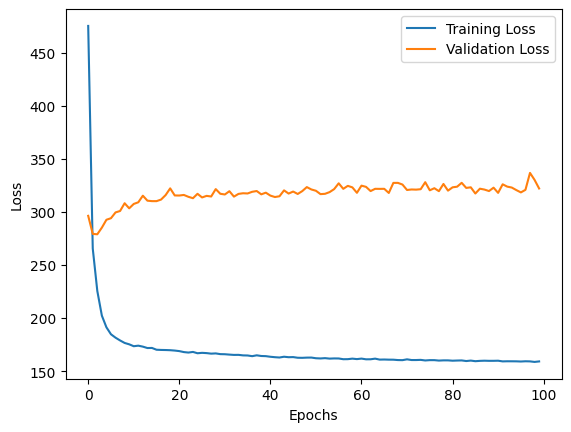

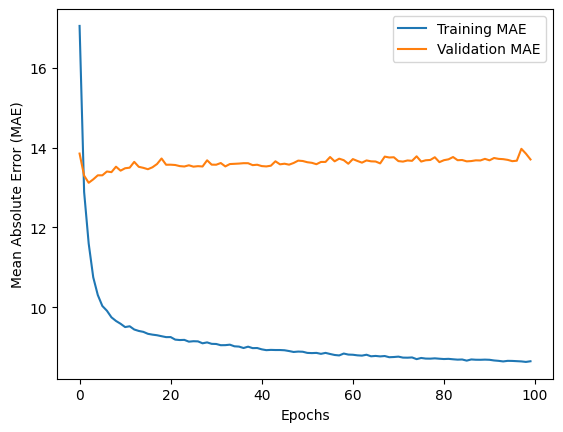

In [105]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = model.predict(X_test)  

# # For binary classification, ensure your predictions are binary (0 or 1)
# y_pred = (y_pred > 0.5).astype(int)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
